--- Schritt 2: LLM-reparierte Daten laden (FF3 Basis) ---
Datensatz geladen: ergebnisse/2.2_rfd_repaired_llm.csv (1326 Zeilen)

--- Schritt 3: Typ-Konvertierung, NaN-Handhabung & Skalierung ---
STATUS: Erzwinge Konvertierung zu Float...
STATUS: Numerische Spalten erfolgreich in Float konvertiert und NaN mit 0 gefüllt.
STATUS: Führe Standardisierung (Skalierung) der Zieldaten durch...
STATUS: Daten erfolgreich skaliert (Z-Score).

--- Schritt 4: Isolation Forest-Methode anwenden (Erweiterte Zielspalten) ---
Starte Isolation Forest-Analyse (fit_predict) auf skalierten Daten...
Isolation Forest-Analyse abgeschlossen.
ERGEBNIS (Isolation Forest): 113 Zeilen wurden als Ausreißer (Label -1) identifiziert.

--- Schritt 5: Visualisierung der Isolation Forest-Ergebnisse (Streudiagramme) ---
Erstelle Streudiagramme zur Visualisierung der Isolation Forest-Ergebnisse...


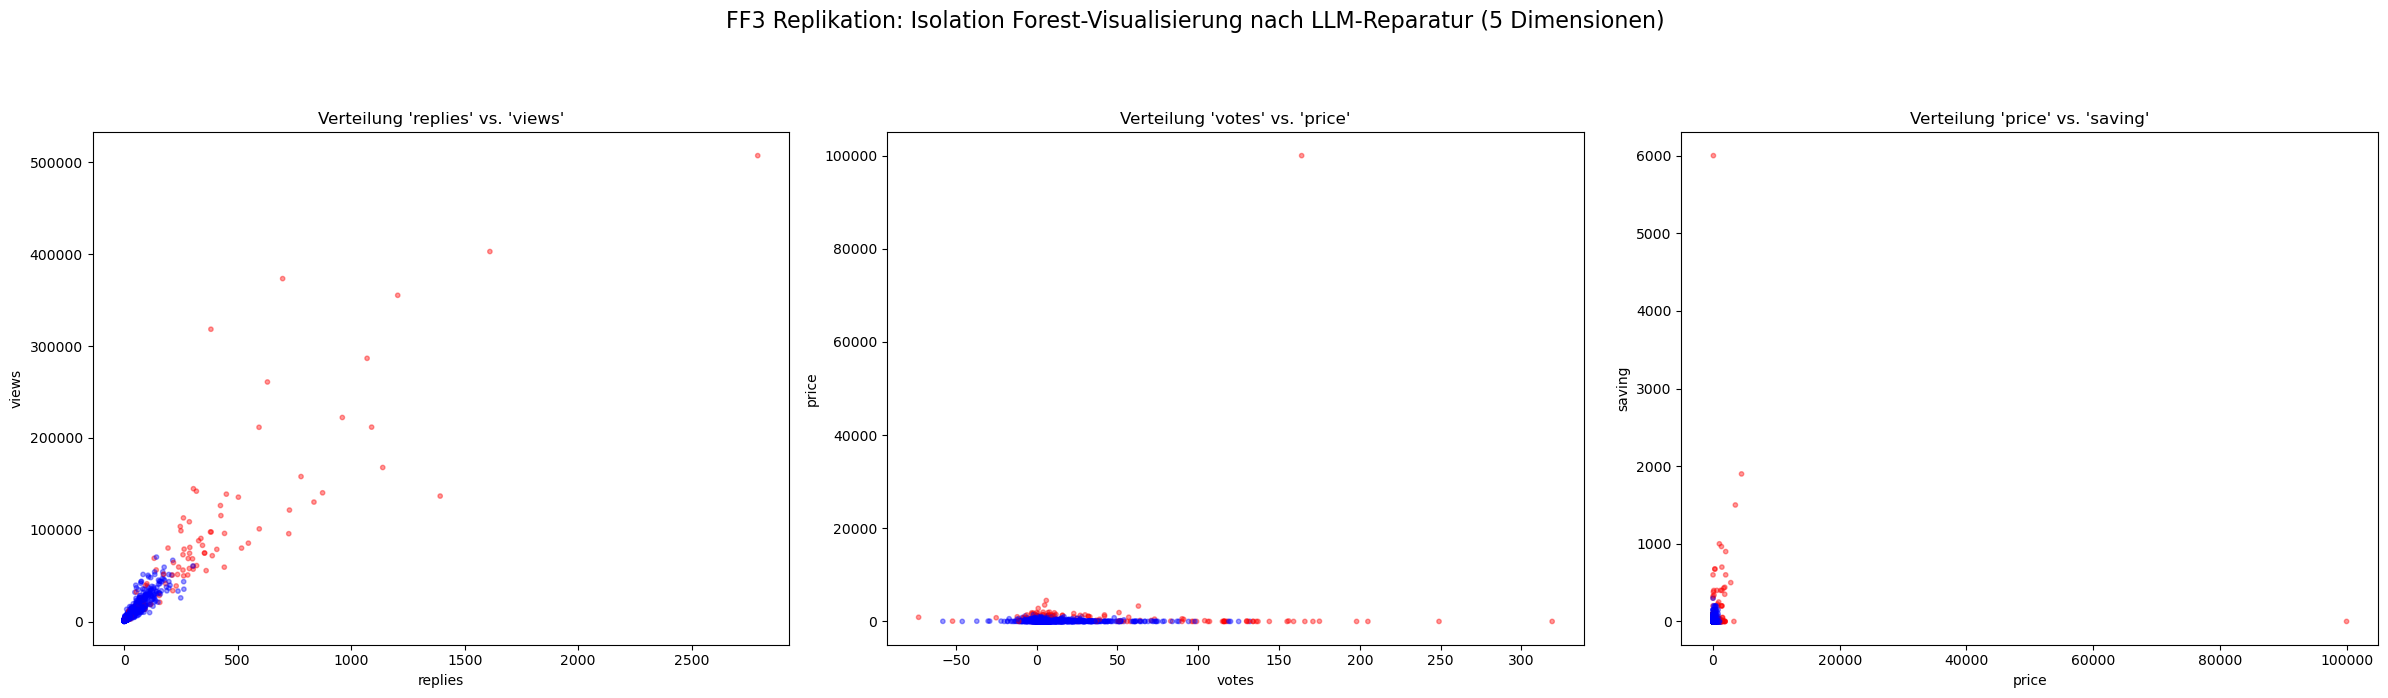


Visuelle Bestätigung: Die Plots zeigen die mehrdimensionale Ausreißer-Erkennung, die durch die Formatbereinigung (FF2) auf den Spalten 'price' und 'saving' ermöglicht wurde.

--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---
Dieses Skript (11) ist nun abgeschlossen.

Ergebnisse (Ausreißer-Indizes) wurden erfolgreich in 'ergebnisse/3.3_iso_forest_ausreisser_indizes.csv' gespeichert.

--- ZUSAMMENFASSUNG EXPERIMENT 3.3 (Isolation Forest Replikation - LLM Basis) ---
ERGEBNIS (COUNT): 113 einzigartige Ausreißerzeilen identifiziert.


In [4]:
################################################################################
# MASTERARBEIT - SKRIPT 11:
# EXPERIMENT 3.3 (Forschungsfrage 3) - ISOLATION FOREST REPLIKATION (LLM-Basis)
################################################################################
#
# ZWECK DIESES SKRIPTS (Methodik gemäß Forschungsfrage 3):
#
# 1. (Basis): Misst den Einfluss der vorherigen LLM-Inkonsistenzbehebung (FF2.2)
#    auf die Ausreißererkennung (Erweiterung auf price/saving).
#
# 2. (Datenbasis): Lädt den vom LLM reparierten Datensatz (2.2_rfd_repaired_llm.csv).
#
# 3. (Zielspalten): Erweitert die Analyse von FF1 ('replies', 'views', 'votes')
#    um die nun numerisch gewordenen Spalten ('price', 'saving').
#
# 4. (Voraussetzung): Führt die notwendige Zwangskonvertierung und Skalierung
#    durch, da der Isolation Forest nur mit skalierten numerischen Daten arbeitet.
#
# 5. (Speichern): Speichert die identifizierten Ausreißer-Indizes für die
#    abschließende Evaluation (Skript 12).
#
################################################################################

# Schritt 1: Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler  # Wird für ML-Methoden benötigt

# --- GLOBALE KONSTANTEN FÜR DIESES EXPERIMENT ---
# Wir replizieren die FF1-Methode, ändern aber die Basis und den Output-Pfad.
DATEIPFAD_LLM_REPAIRED = 'ergebnisse/2.2_rfd_repaired_llm.csv'
DATEIPFAD_OUTPUT = 'ergebnisse/3.3_iso_forest_ausreisser_indizes.csv'

# Zielspalten: FF1-Spalten + die durch FF2 reparierten Spalten
zielspalten = ['replies', 'views', 'votes', 'price', 'saving']

#
################################################################################

# SCHRITT 2: Laden der LLM-reparierten Daten (FF2.2 Ergebnis)
print("--- Schritt 2: LLM-reparierte Daten laden (FF3 Basis) ---")

try:
    # LLM-Daten laden (Index wird mitgeladen)
    df_llm = pd.read_csv(DATEIPFAD_LLM_REPAIRED, index_col='original_index')
    df_llm = df_llm.reset_index(drop=True)
    print(f"Datensatz geladen: {DATEIPFAD_LLM_REPAIRED} ({df_llm.shape[0]} Zeilen)")
except FileNotFoundError:
    print(f"FEHLER: LLM-Ergebnisdatei '{DATEIPFAD_LLM_REPAIRED}' nicht gefunden.")
    sys.exit("Skript gestoppt.")

#
################################################################################

# --- SCHRITT 3: Datentyp-Konvertierung und Skalierung (Voraussetzung für Isolation Forest) ---
print("\n--- Schritt 3: Typ-Konvertierung, NaN-Handhabung & Skalierung ---")

# 1. Numerische Konvertierung erzwingen (price, saving)
try:
    print("STATUS: Erzwinge Konvertierung zu Float...")
    # Da Isolation Forest nur mit numerischen Daten arbeitet, müssen wir
    # die reparierten Spalten (price, saving) explizit konvertieren.
    numerische_spalten_repariert = ['price', 'saving']
    
    for col in numerische_spalten_repariert:
        df_llm[col] = pd.to_numeric(df_llm[col], errors='coerce')
    
    # NaN-Handhabung: Isolation Forest kann keine NaN verarbeiten. Wir füllen NaNs mit 0.
    df_llm[numerische_spalten_repariert] = df_llm[numerische_spalten_repariert].fillna(0)
    
    print("STATUS: Numerische Spalten erfolgreich in Float konvertiert und NaN mit 0 gefüllt.")
    
    # 2. Skalierung (zwingend für ML-Methoden)
    # Isolation Forest basiert auf Distanzmessungen. Standardisierung (Z-Score)
    # ist notwendig, um die Dominanz großer Spalten (views) zu verhindern.
    
    print("STATUS: Führe Standardisierung (Skalierung) der Zieldaten durch...")
    
    X_data = df_llm[zielspalten].values
    
    scaler = StandardScaler()
    X_skaliert = scaler.fit_transform(X_data)
    
    print("STATUS: Daten erfolgreich skaliert (Z-Score).")
    
except Exception as e:
    print(f"FEHLER bei der Skalierung/Typkonvertierung: {e}")
    sys.exit("Skript gestoppt.")

#
################################################################################

# SCHRITT 4: Definition und Anwendung der Isolation Forest-Methode (Replikation von FF1)
print("\n--- Schritt 4: Isolation Forest-Methode anwenden (Erweiterte Zielspalten) ---")

# Isolation Forest-Parameter bleiben identisch zu Skript 04 (FF1) für faire Replikation
iso_forest_modell = IsolationForest(contamination='auto', random_state=42)

print("Starte Isolation Forest-Analyse (fit_predict) auf skalierten Daten...")

# Training und Vorhersage auf den skalierten Daten
y_vorhersage = iso_forest_modell.fit_predict(X_skaliert)
print("Isolation Forest-Analyse abgeschlossen.")

# 4. Extrahieren der als Ausreißer identifizierten Indizes
ausreisser_indizes_iso = df_llm.index[y_vorhersage == -1].tolist()

print(f"ERGEBNIS (Isolation Forest): {len(ausreisser_indizes_iso)} Zeilen wurden als \
Ausreißer (Label -1) identifiziert.")
print("=" * 70)

#
################################################################################

# SCHRITT 5: Visualisierung der Isolation Forest-Ergebnisse (Streudiagramme)
print("\n--- Schritt 5: Visualisierung der Isolation Forest-Ergebnisse (Streudiagramme) ---")

# Da wir nun 5 Dimensionen haben, wählen wir die relevantesten 2D-Kombinationen
# für die Visualisierung der Ausreißer.
print("Erstelle Streudiagramme zur Visualisierung der Isolation Forest-Ergebnisse...")

farben = np.where(y_vorhersage == 1, 'blue', 'red')
plot_kombinationen = [
    ('replies', 'views'),
    ('votes', 'price'),
    ('price', 'saving') # Neue, durch FF2 ermöglichte Korrelation
]

fig, axes = plt.subplots(nrows=1, ncols=len(plot_kombinationen), figsize=(24, 7))

fig.suptitle('FF3 Replikation: Isolation Forest-Visualisierung nach LLM-Reparatur (5 Dimensionen)', 
             fontsize=16, y=1.02)

for i, (spalte_x, spalte_y) in enumerate(plot_kombinationen):
    ax = axes[i]
    
    ax.scatter(
        df_llm[spalte_x], 
        df_llm[spalte_y], 
        c=farben,       
        s=10,           
        alpha=0.4       
    )
    
    ax.set_title(f"Verteilung '{spalte_x}' vs. '{spalte_y}'")
    ax.set_xlabel(spalte_x)
    ax.set_ylabel(spalte_y)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nVisuelle Bestätigung: Die Plots zeigen die mehrdimensionale Ausreißer-Erkennung, \
die durch die Formatbereinigung (FF2) auf den Spalten 'price' und 'saving' ermöglicht wurde.")
print("=" * 70)
#
################################################################################

# --- SCHRITT 6: Ergebnisse speichern und Zusammenfassung ---
print("\n--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---")
print("Dieses Skript (11) ist nun abgeschlossen.")

# os.makedirs(os.path.dirname(DATEIPFAD_OUTPUT), exist_ok=True)
os.makedirs('ergebnisse', exist_ok=True)

# 1. Definieren des Dateipfads für die Ergebnisse (FF3 LLM Basis)
DATEIPFAD_OUTPUT = 'ergebnisse/3.3_iso_forest_ausreisser_indizes.csv'
# 2. Umwandeln des Sets in eine sortierte Liste (aus der Hauptschleife)
ausreisser_liste_sortiert = sorted(ausreisser_indizes_iso)

# 3. Erstellen und Speichern des DataFrames
df_ergebnisse_iso = pd.DataFrame(ausreisser_liste_sortiert, columns=['Ausreisser_Index'])

try:
    df_ergebnisse_iso.to_csv(DATEIPFAD_OUTPUT, index=False)
    
    if not os.path.exists(DATEIPFAD_OUTPUT):
        raise Exception("Datei wurde nicht im Pfad erstellt.")

    print(f"\nErgebnisse (Ausreißer-Indizes) wurden erfolgreich in '{DATEIPFAD_OUTPUT}' gespeichert.")

    # --- ZUSAMMENFASSUNG (Für das Protokoll/die Masterarbeit) ---
    print("\n--- ZUSAMMENFASSUNG EXPERIMENT 3.3 (Isolation Forest Replikation - LLM Basis) ---")
    print(f"ERGEBNIS (COUNT): {len(df_ergebnisse_iso)} einzigartige Ausreißerzeilen identifiziert.")
    print("======================================================================")

except Exception as e:
    print(f"\nKRITISCHER FEHLER BEIM SPEICHERN: {e}")
    sys.exit("Skript gestoppt.")
